In [180]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(3)
%matplotlib inline
class fictitious_play:

    def __init__(self, game_type, p1_beliefs, p2_beliefs):
        games = {"rps":np.asarray([[[0,0],[1,-1],[-1,1]],[[-1,1],[0,0],[1,-1]],[[1,-1],[-1,1],[0,0]]]),
                "shapley":np.asarray([[[0,0],[1,0],[0,1]],[[0,1],[0,0],[1,0]],[[1,0],[0,1],[0,0]]]),
                 "battle":np.asarray([[[2,1],[0,0]],[[0,0],[1,2]]]),
                 "coordination":np.asarray([[[2,2],[0,0]],[[0,0],[1,1]]]),
                 "pennies":np.asarray([[[1,-1],[-1,1]],[[-1,1],[1,-1]]])
                }
        self.p1_beliefs = p1_beliefs.copy()
        self.p2_beliefs = p2_beliefs.copy()

        self.game = games[game_type]
        self.historical_beliefs1 = []
        self.historical_beliefs2 = []
        #print(self.game)
    
    def normalize(self, matrix):
        if isinstance(matrix,list) or len(matrix.shape)==1:
            return matrix/np.sum(matrix)
        else:
            return matrix/(np.sum(matrix,axis=1)[:,None])

    def get_best_response(self, beliefs_about_opponent, player="row", verbose=False):
        """
        Args:
            beliefs_about_opponent (list of counts for each action)
        Return:
            index of best response
        """
        
        belief_about_opp = self.normalize(beliefs_about_opponent)
        if player == "row":
            br = np.argmax(np.matmul(belief_about_opp, self.game[:,:,0]).reshape(-1))
        else:
            br = np.argmax(np.matmul(self.game[:,:,1], belief_about_opp).reshape(-1))

        if verbose:
            print("Beliefs",belief_about_opp)
            print("Payoffs",self.game[:,:,0])
            print("BR",br)
        return br  

    def play_one_game(self, verbose=False):
        self.historical_beliefs1.append(self.p1_beliefs.copy())
        self.historical_beliefs2.append(self.p2_beliefs.copy())
        p1_move = self.get_best_response(self.p1_beliefs, "row")
        p2_move = self.get_best_response(self.p2_beliefs, "column")
        self.p2_beliefs[p1_move] += 1
        self.p1_beliefs[p2_move] += 1
        if verbose:
            print("Beliefs: {},{}".format(self.p1_beliefs, self.p2_beliefs)) 
        
    def play_games(self, n=10, verbose=False):
        for i in range(0, n):
            self.play_one_game(verbose=verbose)
            #print(self.normalize(self.p1_beliefs))

    def plot_strategies(self, beliefs, verbose=False):
        beliefs = np.asarray(beliefs)
        normalized = beliefs/(np.sum(beliefs,axis=1)[:,None])
        plt.ylim([-.01,1.01])
        if normalized.shape[1]==3:
            plt.xlabel("Action 1")
            plt.ylabel("Action 2")
            plt.plot(normalized[:,0],normalized[:,1])
        else:
            plt.xlabel("Time")
            plt.ylabel("Action 1")
            plt.plot(range(0,len(normalized[:,0])), normalized[:,0], )
        plt.show()
        if verbose:
            print(normalized)
        




Row player beliefs


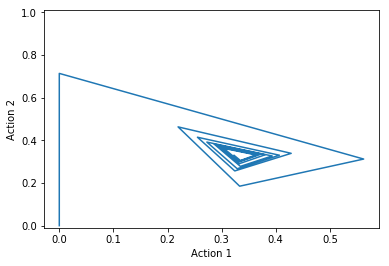

In [181]:
# 3x3 game
row_beliefs = [0,0,1]
column_beliefs = [0,1,0]

game = "rps"
engine = fictitious_play(game, row_beliefs, column_beliefs)
engine.play_games(1000)

print("Row player beliefs")
engine.plot_strategies(engine.historical_beliefs1)

[[[ 1 -1]
  [-1  1]]

 [[-1  1]
  [ 1 -1]]]


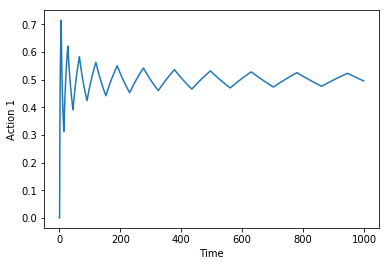

In [156]:
row_beliefs = [0,1]
column_beliefs = [1,0]

game = "pennies"
engine = fictitious_play(game, row_beliefs, column_beliefs)
engine.play_games(1000)
print("Row player beliefs")
engine.plot_strategies(engine.historical_beliefs1)


[[[0 0]
  [1 0]
  [0 1]]

 [[0 1]
  [0 0]
  [1 0]]

 [[1 0]
  [0 1]
  [0 0]]]
Row player beliefs


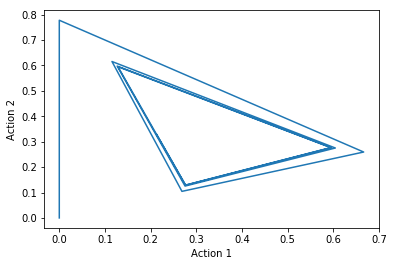

In [158]:
row_beliefs = [0,0,1]
column_beliefs = [0,1,0]

game = "shapley"
engine = fictitious_play(game, row_beliefs, column_beliefs)
engine.play_games(100000)
print("Row player beliefs")
engine.plot_strategies(engine.historical_beliefs1)


[[[2 1]
  [0 0]]

 [[0 0]
  [1 2]]]
Row player beliefs


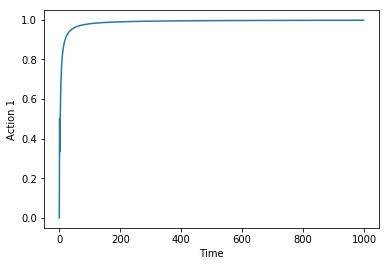

In [159]:
row_beliefs = [0,1]
column_beliefs = [1,0]

game = "battle"
engine = fictitious_play(game, row_beliefs, column_beliefs)
engine.play_games(1000)
print("Row player beliefs")
engine.plot_strategies(engine.historical_beliefs1)


Row: [0, 1]
Column: [0, 1]
Row player beliefs


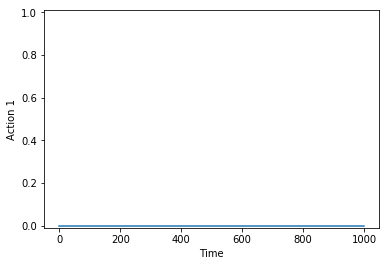

Row: [0, 1]
Column: [1, 0]
Row player beliefs


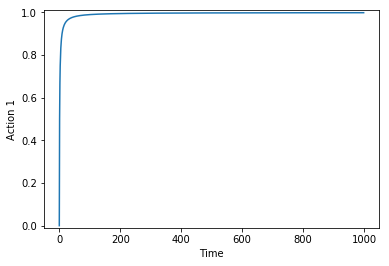

Row: [1, 0]
Column: [0, 1]
Row player beliefs


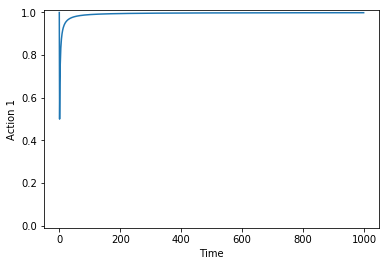

Row: [1, 0]
Column: [1, 0]
Row player beliefs


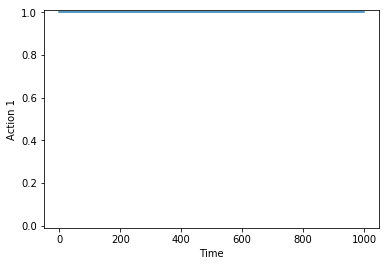

In [182]:

game = "coordination"

for row_beliefs in ([0,1],[1,0]):
    #print(row_beliefs)
    for column_beliefs in [[0,1],[1,0]]:
        print("Row:", row_beliefs)
        print("Column:", column_beliefs)
        engine = fictitious_play(game, row_beliefs, column_beliefs)
        engine.play_games(1000)
        
        print("Row player beliefs")
        engine.plot_strategies(engine.historical_beliefs1)


In [172]:
for row_beliefs in ([0,1],[1,0]):
    print(row_beliefs)

[0, 1]
[1, 0]
